# Guía ANOVA factorial
(x emilopez)

**Ejercicio 1.** ( 6.1, Kuehl) Un proceso de producción quı́mica consiste de una primera reacción con un
alcohol y una segunda reacción con una base. Se realizó un experimento factorial de 3 × 2, con tres
alcoholes y dos bases, con cuatro reacciones réplicas en un diseño totalmente aleatorizado. Los datos
se reunieron como porcentaje de la reacción y son los que se encuentran en la siguiente tabla.

- Guía ``Estadistica.Aplicada.2018/02_Disenio_Factorial_y_bloques/Practica_Anova_Factorial.pdf``
- Datos: ``C6P1datos.txt``

In [15]:
datos = read.table("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/02_disenio_factorial_y_bloques/datos/C6P1datos.txt", header=TRUE, sep='\t')
attach(datos)
# hacemos factores

Basef = as.factor(Base)
Alcoholf = as.factor(Alcohol)

The following objects are masked from datos (pos = 6):

    Alcohol, Base, Porc



**A)** Escriba el modelo estadı́stico sobre el que basará su estudio y explique sus componentes.

El modelo estadı́stico es:

$$y_{ijk}=\mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk}$$

donde $\mu$ es la media general, $\alpha_i$ es el efecto debido al i-ésimo nivel del fator A, $\beta_j$ es el efecto j-ésimo nivel del factor B, $(\alpha \beta)_{ij}$ representa el efecto de la interacción en la combinación ij y $\epsilon_{ijk}$ es el error aleatorio

**B)** Establezca las suposiciones necesarias para un análisis de varianza de los datos.

Las suposiciones que se siguieron sobre el error aleatorio (residuos) es que:
- sigue una distribución normal con media cero 
- varianza constante $\sigma^2$ 
- independientes entre sí. 

**C)** Realice el análisis de varianza.

Hacemos el anális de ANOVA teniendo en cuenta la interacción de los factores, vemos el p-valor de *Basef:Alcoholf* es pequeño (0.0135), por lo que podemos asumir que hay interacción aunque no parece ser muy significativa.

In [7]:
modelo = aov(Porc~Basef*Alcoholf)
summary(modelo)

               Df Sum Sq Mean Sq F value Pr(>F)  
Basef           1   6.51   6.510   3.188 0.0910 .
Alcoholf        2   5.40   2.698   1.321 0.2915  
Basef:Alcoholf  2  22.57  11.283   5.525 0.0135 *
Residuals      18  36.76   2.042                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**D)** Analice la validez de los supuestos establecidos en b).

- *Test de Shapiro* para evaluar normalidad junto al gráfico qqnorm
- *Test de Levene* para evaluar varianzas constantes

Veremos que si no podemos asegurar su normalidad entonces debemos hacer una transformación.


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.95049, p-value = 0.2777


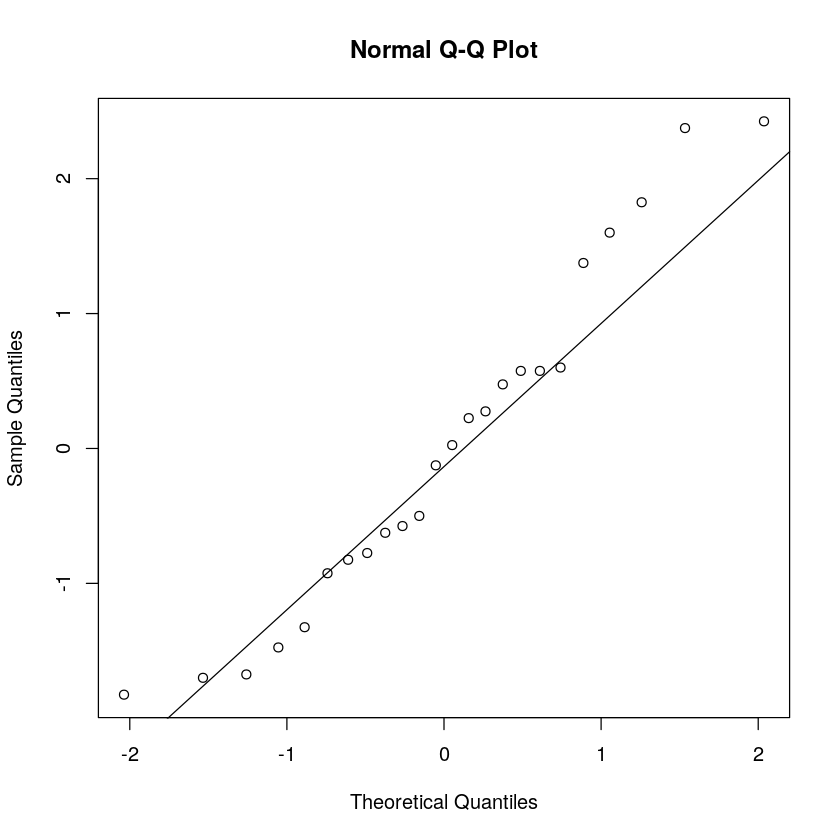

In [12]:
shapiro.test(modelo$residuals) 
qqnorm(modelo$residuals)
qqline(modelo$residuals)

In [ ]:
library(car)
leveneTest(modelo)

Como ambos tests me dieron pvalores grandes, entonces acepto las hipótesis nula, de normalidad y varianzas constantes. 

La tabla ANOVA ya nos dió información sobre la existencia de interacción, veamos que el gráfico de interacción nos lo confirma. 

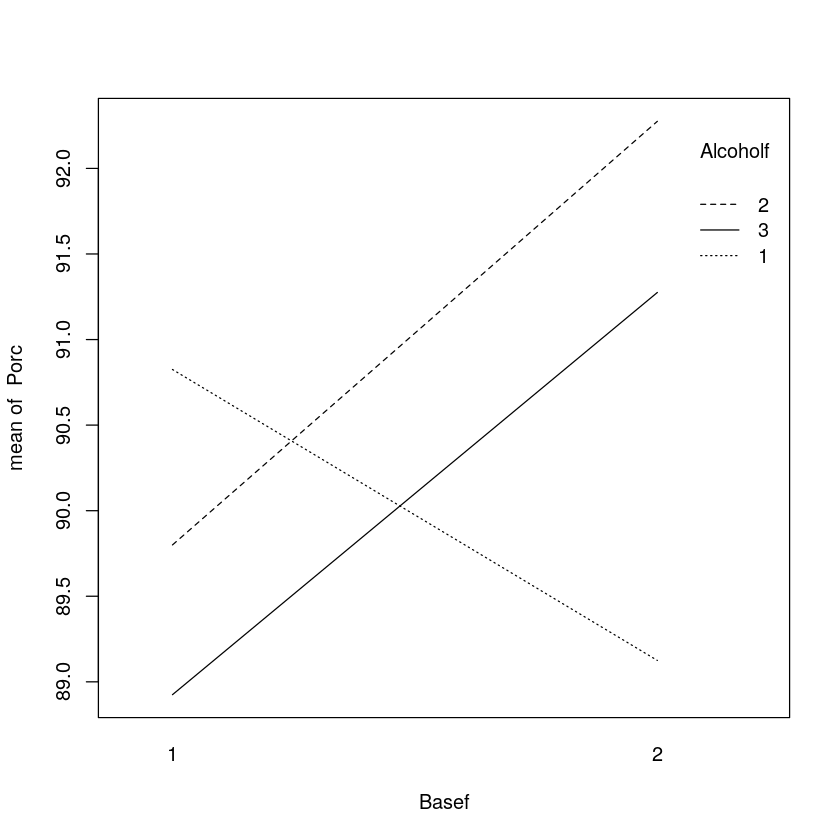

In [9]:
interaction.plot(Basef, Alcoholf, Porc)

**E)** Construya una tabla de medias de celdas y marginales, y muestre sus errores estándar respectivos.

 Basef Alcoholf lsmean        SE df lower.CL upper.CL
 1     1        90.825 0.7145074 18 89.32388 92.32612
 2     1        89.125 0.7145074 18 87.62388 90.62612
 1     2        89.800 0.7145074 18 88.29888 91.30112
 2     2        92.275 0.7145074 18 90.77388 93.77612
 1     3        88.925 0.7145074 18 87.42388 90.42612
 2     3        91.275 0.7145074 18 89.77388 92.77612

Confidence level used: 0.95 

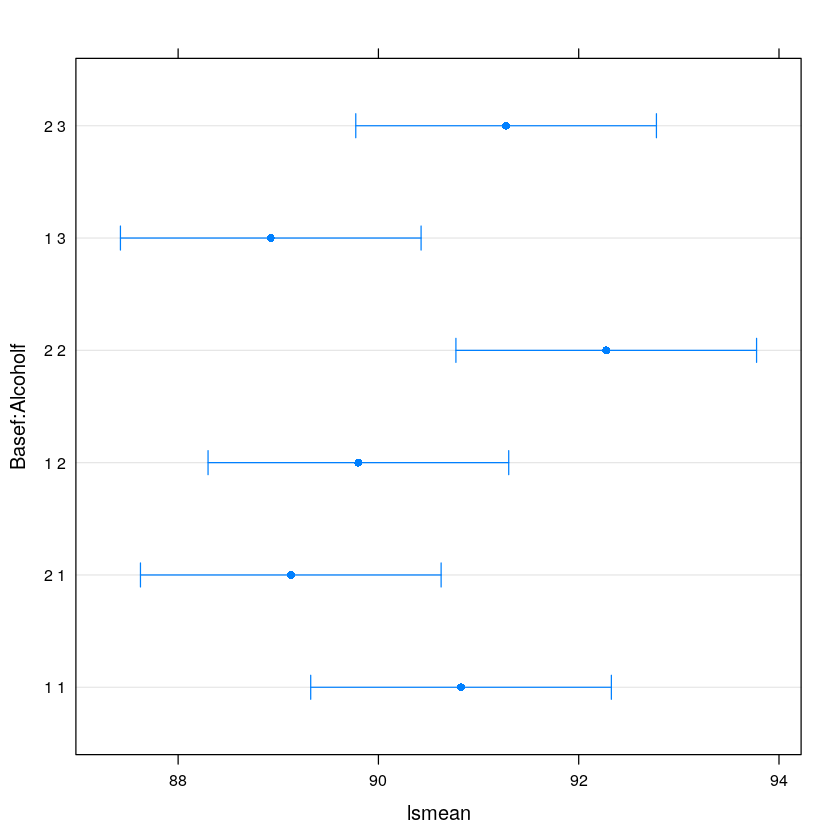

In [20]:
library(lsmeans)
lsmeans(modelo, ~Basef*Alcoholf)
plot(lsmeans(modelo, ~Basef*Alcoholf))

**F)** Pruebe la hipótesis nula de que no hay efectos de interacción base × alcohol. ¿Cuál es su conclusión
de la prueba? ¿Qué recomienda como siguiente paso en el análisis?

Vamos a generar una variable que represente la interacción y veremos nuevamente la tabla ANOVA.

In [27]:
datos$interaccion = factor(paste0(Basef, Alcoholf))
attach(datos)

The following objects are masked from datos (pos = 8):

    Alcohol, Base, interaccion, Porc

The following objects are masked from datos (pos = 9):

    Alcohol, Base, Porc

The following objects are masked from datos (pos = 13):

    Alcohol, Base, Porc



Vemos en la siguiente tabla ANOVA que tenemos un pvalor menor que el nivel de significancia por lo tanto corroboramos que la interacción es significativa. 

In [23]:
m2 = aov(Porc~interaccion)
summary(m2)

            Df Sum Sq Mean Sq F value Pr(>F)  
interaccion  5  34.47   6.894   3.376 0.0252 *
Residuals   18  36.76   2.042                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**G)** Utilice contraste múltiples entre las medias de celdas para ayudar a explicar la interacción. Por
ejemplo, compare las dos bases para cada alcohol.

Veremos todas las comparaciones usando Tukey, de manera tal que los IC que no contengan el 0 podremos decir que no son equivalentes. Del gráfico vemos que salvo la base 2 con el alcohol 2 con la base con el alcohol 3 difieren,  todas las demás son equivalentes.

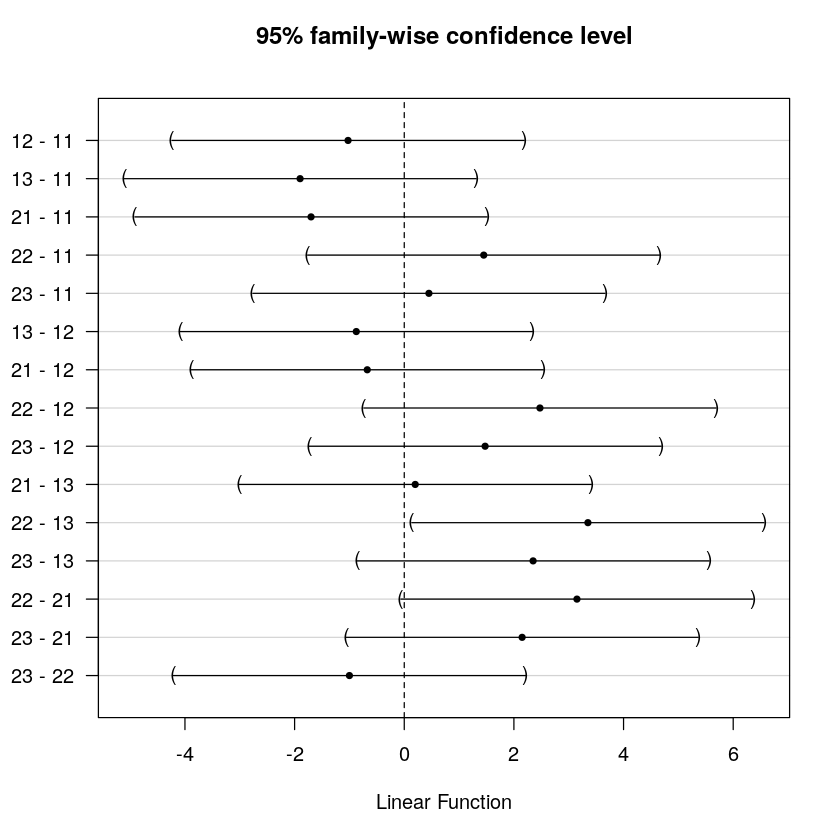

In [26]:
# si podemos usar tukey para comparaciones multiples
library(multcomp)
mc = glht(m2, linfct=mcp(interaccion="Tukey"))
plot(mc)